In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
os.chdir("D:\\study\\imarticus\\python\pandas files\\Hackathon")

# DATA DESCRIPTION
This dataset consists of the related features ,By using this features We have to predict the whether the customer is_interested , may_consider or not_interested

# ATTRIBUTE INFORMATION

1.Email : mail id of the customer

2.Type : Type of the account

3.started_free_trail : whethere the customer has started the free trail or not

4.Decision Maker : decision making of the customer

5.Designation : Job role of the customer

6.Employee Size : Number of employee

7.Visited Pricing : yes or no

8.Visited integrations : yes or no

9.Visited Platform : yes or no

10.country : customer belongs to which country

11.Acquisition Sources : Source of knowing

12.When do you need to solution : result of the solution

13.Sources : software which are used

14.Status : whethere  the customer is_interested , may_consider or not_interested 


In [18]:
train = pd.read_csv("l2train.csv")
train

,Email,Type,Started free trial,Decision maker,Designation,Employee Size,Visited Pricing,Visited Integrations,Visited Platform,Country,Acquisition Source,When do you need to Solution,Sources,Destinations,Status
0,1@customer-leads.com,request quote,No,No,Tech lead,6378,Yes,No,Yes,China,Ads - ETL Tools,This Quarter,"redshift,s3,tableau","postgres,s3,ms_sql",Not Interested
1,2@customer-leads.com,request quote,No,Yes,Swe,1344,No,No,Yes,Us,Direct - Home,Early Exploration,google_analytics,redshift,May Consider
2,3@customer-leads.com,created account,No,Yes,Cto,6970,No,No,Yes,Us,Blog - Redshift - X to Y,Early Exploration,"mysql,ms_sql","bigquery,s3",May Consider
3,4@customer-leads.com,request quote,Yes,No,Tech lead,4463,Yes,No,No,India,Blog - Redshift - Generic,In A Month,"mysql,ms_sql",redshift,Not Interested
4,5@customer-leads.com,request quote,Yes,No,Business analyst,7855,No,No,No,Germany,Blog - Redshift - X to Y,This Quarter,"mysql,ms_sql","postgres,s3,ms_sql",Not Interested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1796@customer-leads.com,created account,No,No,Ceo,2626,Yes,Yes,No,Germany,Blog - Generic,In A Month,google_analytics,"bigquery,s3",Not Interested
1796,1797@customer-leads.com,contact us,Yes,No,Swe,6590,No,No,Yes,Japan,Direct - Home,In A Month,"redshift,s3,tableau",ms_sql,Not Interested
1797,1798@customer-leads.com,request demo,No,No,Tech lead,7953,Yes,Yes,Yes,Denmark,Blog - Redshift - Generic,This Quarter,"aurora,s3","postgres,s3,ms_sql",Not Interested
1798,1799@customer-leads.com,request demo,Yes,Yes,Tech lead,589,Yes,No,No,India,Blog - Generic,In A Month,"mysql,ms_sql","snowflake,rds,ms_sql",Interested


In [8]:
train.columns

Index(['Email', 'Type', 'Started free trial', 'Decision maker', 'Designation',
       'Employee Size', 'Visited Pricing ', 'Visited Integrations ',
       'Visited Platform ', 'Country', 'Acquisition Source',
       'When do you need to Solution', 'Sources', 'Destinations', 'Status'],
      dtype='object')

In [19]:
test = pd.read_csv("l2test.csv")
test

,Email,Type,Started free trial,Decision maker,Designation,Employee Size,Visited Pricing,Visited Integrations,Visited Platform,Country,Acquisition Source,When do you need to Solution,Sources,Destinations
0,1801@customer-leads.com,created account,Yes,Yes,Tech lead,4368,Yes,No,No,Germany,Blog - Redshift - X to Y,In A Month,google_analytics,ms_sql
1,1802@customer-leads.com,request quote,Yes,No,Ceo,9030,Yes,No,No,China,Direct - Home,Early Exploration,"python,chartio,superset","postgres,s3,ms_sql"
2,1803@customer-leads.com,request demo,Yes,No,Tech lead,7806,Yes,No,No,Germany,Blog - Redshift - X to Y,Immediately,"redshift,s3,tableau",redshift
3,1804@customer-leads.com,created account,No,No,Cto,9655,Yes,No,Yes,Denmark,Blog - Redshift - Generic,Early Exploration,"aurora,s3","bigquery,s3"
4,1805@customer-leads.com,request quote,No,No,Cto,3211,Yes,Yes,No,Denmark,Blog - Redshift - X to Y,Early Exploration,google_analytics,redshift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2496@customer-leads.com,created account,Yes,Yes,Ceo,7606,No,No,Yes,Denmark,Ads - ETL Tools,Immediately,"redshift,s3,tableau","snowflake,rds,ms_sql"
696,2497@customer-leads.com,request quote,Yes,Yes,Ceo,7973,No,No,No,Denmark,Blog - Generic,Immediately,"mysql,ms_sql","postgres,s3,ms_sql"
697,2498@customer-leads.com,created account,Yes,Yes,Ceo,4431,Yes,No,No,Denmark,Blog - Redshift - X to Y,This Quarter,"redshift,s3,tableau","postgres,s3,ms_sql"
698,2499@customer-leads.com,contact us,Yes,Yes,Cto,1276,No,No,No,Germany,Direct - Home,Early Exploration,"aurora,s3",redshift


In [10]:
test.columns

Index(['Email', 'Type', 'Started free trial', 'Decision maker', 'Designation',
       'Employee Size', 'Visited Pricing ', 'Visited Integrations ',
       'Visited Platform ', 'Country', 'Acquisition Source',
       'When do you need to Solution', 'Sources', 'Destinations'],
      dtype='object')

In [15]:
train.isna().sum()

Type                            0
Started free trial              0
Decision maker                  0
Designation                     0
Employee Size                   0
Visited Pricing                 0
Visited Integrations            0
Visited Platform                0
Country                         0
Acquisition Source              0
When do you need to Solution    0
Sources                         0
Destinations                    0
Status                          0
dtype: int64

In [16]:
test.isna().sum()

Type                            0
Started free trial              0
Decision maker                  0
Designation                     0
Employee Size                   0
Visited Pricing                 0
Visited Integrations            0
Visited Platform                0
Country                         0
Acquisition Source              0
When do you need to Solution    0
Sources                         0
Destinations                    0
dtype: int64

In [11]:
train["Email"].unique().shape

(1800,)

In [20]:
train.drop(["Email"],axis = 1,inplace = True)

In [21]:
test.drop(["Email"],axis = 1,inplace =True)

In [14]:
train["Type"].value_counts()

request demo        470
request quote       456
created account     450
contact us          424
Name: Type, dtype: int64

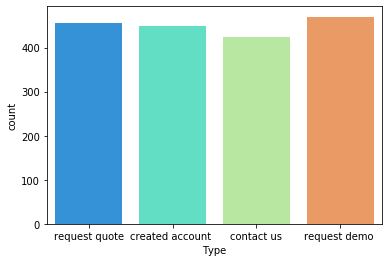

In [18]:
import seaborn as sns
sns.countplot(data = train, x = "Type",palette = "rainbow")

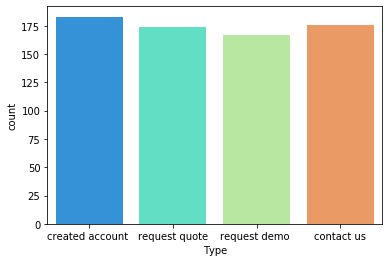

In [19]:
sns.countplot(data = test, x = "Type",palette = "rainbow")

In [20]:
train["Status"].value_counts()

Not Interested    853
Interested        477
May Consider      470
Name: Status, dtype: int64

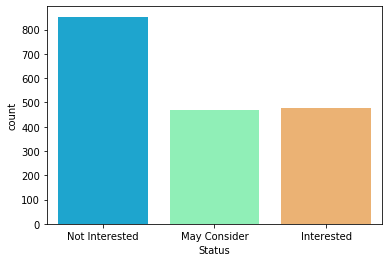

In [24]:
sns.countplot(data =train,x = "Status",palette = "rainbow");

In [22]:
train["Status"].replace({"Not Interested":0,"May Consider":1,"Interested":2},inplace =True)

In [30]:
train["Status"].value_counts()

0    853
2    477
1    470
Name: Status, dtype: int64

In [31]:
train["Started free trial"].value_counts()

No     906
Yes    894
Name: Started free trial, dtype: int64

In [32]:
test["Started free trial"].value_counts()

No     358
Yes    342
Name: Started free trial, dtype: int64

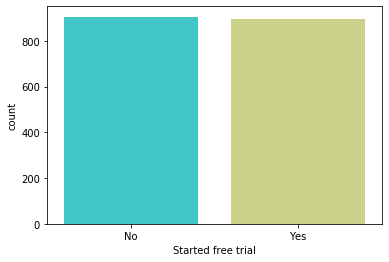

In [36]:
sns.countplot(data = train,x = "Started free trial",palette = "rainbow");

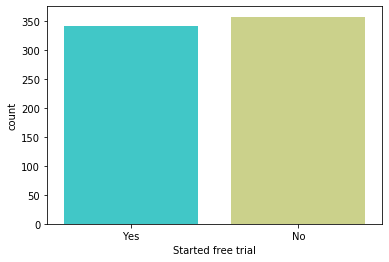

In [37]:
sns.countplot(data = test,x = "Started free trial",palette = "rainbow");

In [38]:
train["Decision maker"].value_counts()

Yes    947
No     853
Name: Decision maker, dtype: int64

In [39]:
test["Decision maker"].value_counts()

Yes    351
No     349
Name: Decision maker, dtype: int64

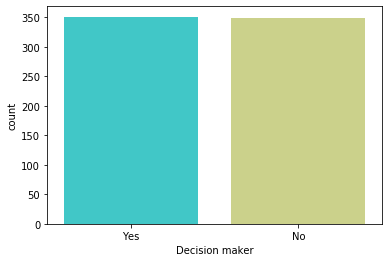

In [40]:
sns.countplot(data = test,x = "Decision maker",palette = "rainbow");

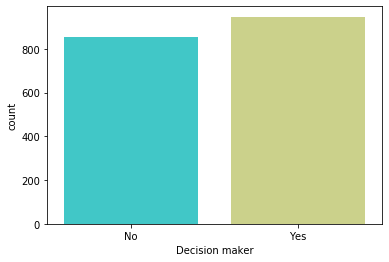

In [41]:
sns.countplot(data = train,x = "Decision maker",palette = "rainbow");

In [42]:
train["Designation"].value_counts()

Tech lead            324
Swe                  311
Ceo                  307
Product manager      297
Business analyst     284
Cto                  277
Name: Designation, dtype: int64

In [43]:
test["Designation"].value_counts()

Ceo                  134
Business analyst     126
Cto                  120
Tech lead            114
Swe                  105
Product manager      101
Name: Designation, dtype: int64

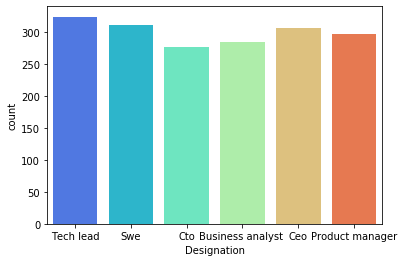

In [44]:
sns.countplot(data = train,x = "Designation",palette = "rainbow");

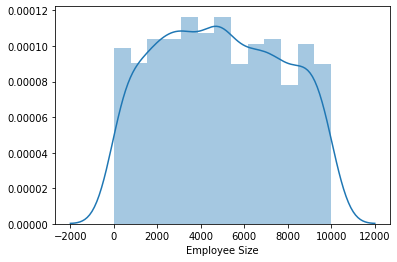

In [45]:
sns.distplot(train["Employee Size"]);

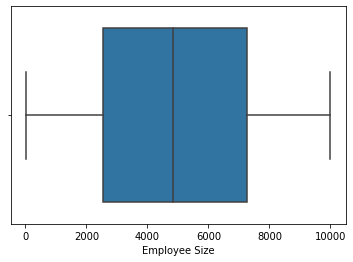

In [46]:
sns.boxplot(train["Employee Size"])

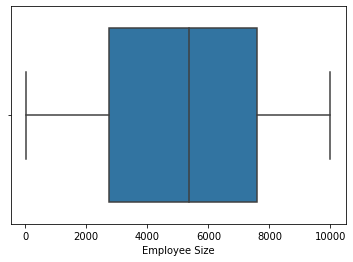

In [47]:
sns.boxplot(test["Employee Size"])

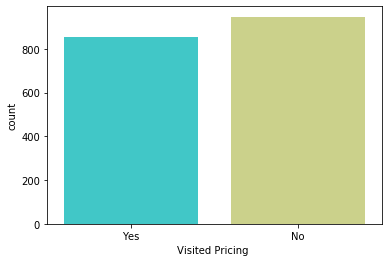

In [48]:
sns.countplot(data =train,x ="Visited Pricing ",palette = 'rainbow')

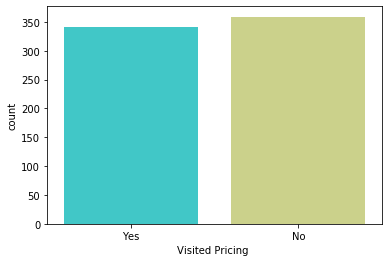

In [49]:
sns.countplot(data =test,x ="Visited Pricing ",palette = 'rainbow')

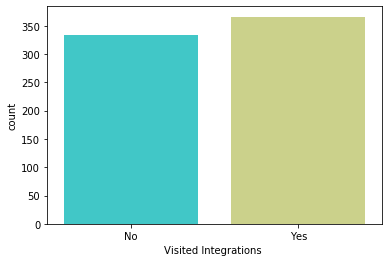

In [51]:
sns.countplot(data =test,x ="Visited Integrations ",palette = 'rainbow')

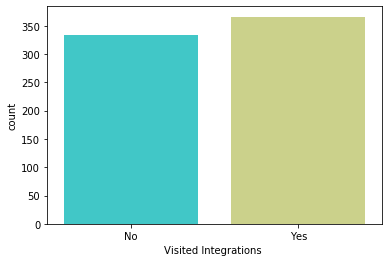

In [52]:
sns.countplot(data =test,x ="Visited Integrations ",palette = 'rainbow')

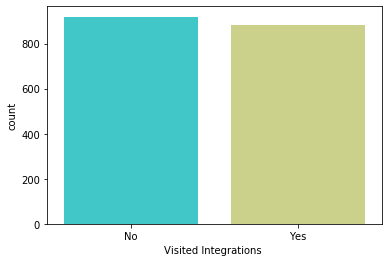

In [53]:
sns.countplot(data =train,x ="Visited Integrations ",palette = 'rainbow')

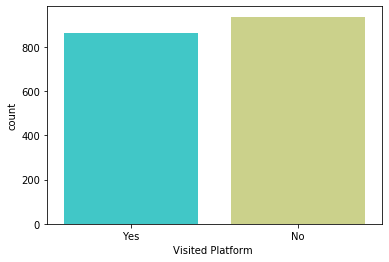

In [55]:
 sns.countplot(data =train,x ="Visited Platform ",palette = 'rainbow')

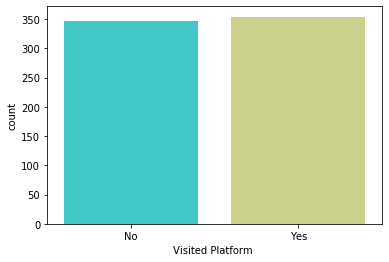

In [56]:
 sns.countplot(data =test,x ="Visited Platform ",palette = 'rainbow')

In [57]:
train["Country"].value_counts()

Denmark    332
Germany    302
China      302
Us         293
Japan      290
India      281
Name: Country, dtype: int64

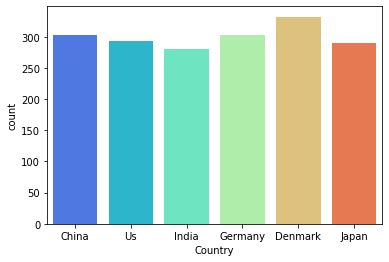

In [58]:
sns.countplot(data =train,x ="Country",palette = 'rainbow')

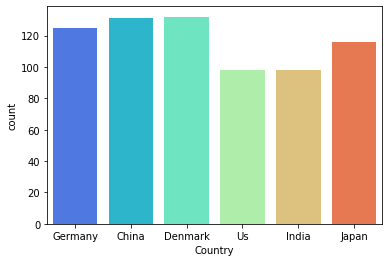

In [59]:
sns.countplot(data =test,x ="Country",palette = 'rainbow')

In [61]:
train["Acquisition Source"].value_counts()

Direct - Home                426
Ads - ETL Tools              350
Blog - Generic               348
Blog - Redshift - X to Y     340
Blog - Redshift - Generic    336
Name: Acquisition Source, dtype: int64

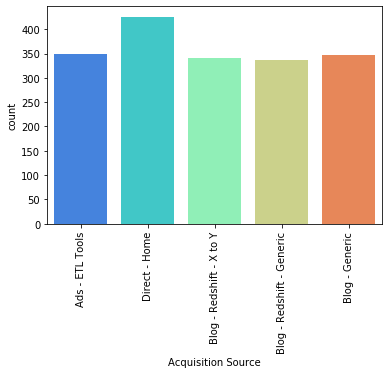

In [64]:
import matplotlib.pyplot as plt
sns.countplot(data = train,x = "Acquisition Source",palette = "rainbow" )
plt.xticks(rotation = "vertical");

In [65]:
train["When do you need to Solution"].value_counts()

In A Month           481
Early Exploration    441
Immediately          440
This Quarter         438
Name: When do you need to Solution, dtype: int64

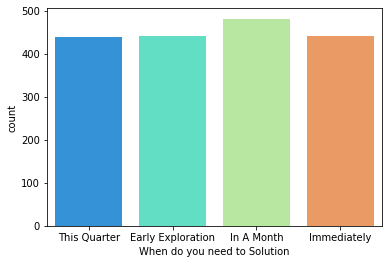

In [66]:
sns.countplot(data = train,x = "When do you need to Solution",palette = "rainbow");

In [67]:
train["Sources"].value_counts()

python,chartio,superset    388
mysql,ms_sql               374
aurora,s3                  348
google_analytics           347
redshift,s3,tableau        343
Name: Sources, dtype: int64

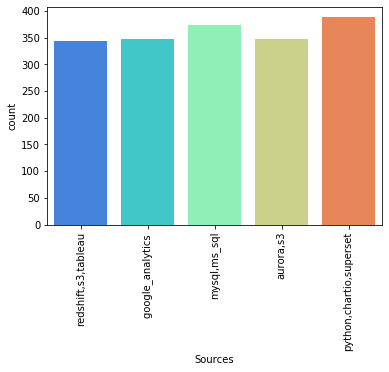

In [71]:
sns.countplot(data = train,x = "Sources",palette = "rainbow")
plt.xticks(rotation = "vertical");

In [73]:
train["Destinations"].value_counts()

bigquery,s3             376
ms_sql                  375
postgres,s3,ms_sql      360
redshift                346
snowflake,rds,ms_sql    343
Name: Destinations, dtype: int64

In [23]:
train_x = train.drop(["Status"],axis =1) 

In [24]:
train_y = train["Status"]

In [25]:
test_x = test

In [26]:
Train_dummies = pd.get_dummies(train_x,drop_first = True)

In [80]:
Train_dummies 

,Employee Size,Type_created account,Type_request demo,Type_request quote,Started free trial_Yes,Decision maker_Yes,Designation_Ceo,Designation_Cto,Designation_Product manager,Designation_Swe,...,When do you need to Solution_In A Month,When do you need to Solution_This Quarter,Sources_google_analytics,"Sources_mysql,ms_sql","Sources_python,chartio,superset","Sources_redshift,s3,tableau",Destinations_ms_sql,"Destinations_postgres,s3,ms_sql",Destinations_redshift,"Destinations_snowflake,rds,ms_sql"
0,6378,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1344,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,6970,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4463,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,7855,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2626,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1796,6590,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
1797,7953,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1798,589,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [27]:
test_dummies = pd.get_dummies(test,drop_first = True)
test_dummies

,Employee Size,Type_created account,Type_request demo,Type_request quote,Started free trial_Yes,Decision maker_Yes,Designation_Ceo,Designation_Cto,Designation_Product manager,Designation_Swe,...,When do you need to Solution_In A Month,When do you need to Solution_This Quarter,Sources_google_analytics,"Sources_mysql,ms_sql","Sources_python,chartio,superset","Sources_redshift,s3,tableau",Destinations_ms_sql,"Destinations_postgres,s3,ms_sql",Destinations_redshift,"Destinations_snowflake,rds,ms_sql"
0,4368,1,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9030,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,7806,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,9655,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3211,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,7606,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
696,7973,0,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
697,4431,1,0,0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
698,1276,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
train_y.dtype

dtype('int64')

In [30]:
model = LogisticRegression().fit(Train_dummies,train_y)

C:\Users\GOJIRAH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
y_test = model.predict(test_dummies)

In [32]:
y_test.shape

(700,)

In [42]:
X_train = train_x
X_test = train_y
y_train = test_dummies
#y_test 

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1800, 13)
(1800,)
(700, 34)
(700,)


In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Type                          1800 non-null   object
 1   Started free trial            1800 non-null   object
 2   Decision maker                1800 non-null   object
 3   Designation                   1800 non-null   object
 4   Employee Size                 1800 non-null   int64 
 5   Visited Pricing               1800 non-null   object
 6   Visited Integrations          1800 non-null   object
 7   Visited Platform              1800 non-null   object
 8   Country                       1800 non-null   object
 9   Acquisition Source            1800 non-null   object
 10  When do you need to Solution  1800 non-null   object
 11  Sources                       1800 non-null   object
 12  Destinations                  1800 non-null   object
dtypes: int64(1), objec

In [33]:
fuu = (train["Employee Size"] - train["Employee Size"].mean())/train["Employee Size"].std()

In [106]:
fuu

0       0.516874
1      -1.262911
2       0.726177
3      -0.160180
4       1.039071
          ...   
1795   -0.809656
1796    0.591827
1797    1.073719
1798   -1.529843
1799    0.205747
Name: Employee Size, Length: 1800, dtype: float64

In [34]:
paa = (test["Employee Size"] - test["Employee Size"].mean())/test["Employee Size"].std()

In [111]:
paa

0     -0.287588
1      1.354680
2      0.923505
3      1.574847
4     -0.695161
         ...   
695    0.853052
696    0.982334
697   -0.265395
698   -1.376797
699   -0.448222
Name: Employee Size, Length: 700, dtype: float64

In [35]:
Train_dummies.drop(["Employee Size"],axis = 1,inplace = True)

In [36]:
Train_dummies["Employee Size"] = fuu

In [120]:
Train_dummies

,Type_created account,Type_request demo,Type_request quote,Started free trial_Yes,Decision maker_Yes,Designation_Ceo,Designation_Cto,Designation_Product manager,Designation_Swe,Designation_Tech lead,...,When do you need to Solution_This Quarter,Sources_google_analytics,"Sources_mysql,ms_sql","Sources_python,chartio,superset","Sources_redshift,s3,tableau",Destinations_ms_sql,"Destinations_postgres,s3,ms_sql",Destinations_redshift,"Destinations_snowflake,rds,ms_sql",Employee Size
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0.516874
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,-1.262911
2,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.726177
3,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,-0.160180
4,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1.039071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.809656
1796,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0.591827
1797,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1.073719
1798,0,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,-1.529843


In [37]:
test_dummies.drop(["Employee Size"],axis =1,inplace =True)

In [38]:
test_dummies["Employee Size"] = paa

In [39]:
test_dummies

,Type_created account,Type_request demo,Type_request quote,Started free trial_Yes,Decision maker_Yes,Designation_Ceo,Designation_Cto,Designation_Product manager,Designation_Swe,Designation_Tech lead,...,When do you need to Solution_This Quarter,Sources_google_analytics,"Sources_mysql,ms_sql","Sources_python,chartio,superset","Sources_redshift,s3,tableau",Destinations_ms_sql,"Destinations_postgres,s3,ms_sql",Destinations_redshift,"Destinations_snowflake,rds,ms_sql",Employee Size
0,1,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,-0.287588
1,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1.354680
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0.923505
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.574847
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,-0.695161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.853052
696,0,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0.982334
697,1,0,0,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,-0.265395
698,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,-1.376797


In [40]:
y_test.shape

(700,)

In [43]:
X_test.shape

(1800,)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
tempMaxVIF = 10
maxVIF = 10
trainXCopy = Train_dummies.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    tempVIFDf = pd.DataFrame() 
  
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    tempVIFDf.dropna(inplace=True)
    
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF):
        
        print(counter)
        print(tempColumnName)
        

        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1
    

In [131]:
highVIFColumnNames

[]

In [49]:
X_train = Train_dummies 
y_train = test_dummies 

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


M1 = DecisionTreeClassifier(random_state=123)
M1 = M1.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous-multioutput'

In [55]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install scikit-multilearn --upgrade

Requirement already up-to-date: scikit-multilearn in c:\users\gojirah\anaconda3\lib\site-packages (0.2.0)
Note: you may need to restart the kernel to use updated packages.


In [58]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [71]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [72]:
classifier = BinaryRelevance(GaussianNB())

In [184]:
classifier.fit(X_train.values,X_test.values.reshape(-1,1))

ClassifierChain(classifier=LogisticRegression(), require_dense=[True, True])

In [183]:
X_test.values.reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [2],
       [0]], dtype=int64)

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [185]:
B_prediction = classifier.predict(y_train)

In [186]:
B_prediction

<700x1 sparse matrix of type '<class 'numpy.float64'>'
	with 351 stored elements in Compressed Sparse Column format>

In [140]:
B_prediction.astype("int64")

<700x1 sparse matrix of type '<class 'numpy.int64'>'
	with 351 stored elements in Compressed Sparse Column format>

In [187]:
h = B_prediction.todense().tolist()

In [188]:
len(h)

700

In [189]:
yuu = []
for i in range(len(h)):
    yuu.append(h[i][0])

In [201]:
x = []
for i in yuu:
    if i == 0.0:
        x.append(i == 0)
    elif i == 1.0:
        i == 1
    else:
        i == 2
        

In [202]:
x

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [200]:
yuu

[2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 1.0,
 2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 1.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0

In [182]:
huu = []
B_prediction.data[3].astype("int64")

1

In [85]:
B_prediction.dtype

dtype('int64')

In [86]:
y_test.dtype

dtype('int64')

In [82]:
y_test.shape

(700,)

In [89]:
y_test

array([2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1,
       2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0,

In [111]:
B_prediction

<700x1 sparse matrix of type '<class 'numpy.int64'>'
	with 351 stored elements in Compressed Sparse Column format>

In [204]:
bino = pd.DataFrame()

In [207]:
bino["result"] = yuu

In [209]:
bino["result"] = bino["result"].astype("int64")

In [211]:
bino.drop(["resu"],inplace = True,axis = 1)

In [212]:
bino

,result
0,2
1,0
2,0
3,0
4,0
...,...
695,2
696,2
697,2
698,2


In [226]:
bino["result"].replace({0:"Not Interested",1:"May Consider",2:"Interested"},inplace =True)

In [227]:
bino.to_csv("nbinomial.csv")

In [215]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [216]:
classifier = ClassifierChain(LogisticRegression())

In [217]:
classifier.fit(X_train.values,X_test.values.reshape(-1,1))

ClassifierChain(classifier=LogisticRegression(), require_dense=[True, True])

In [219]:
l_predictions = classifier.predict(y_train)

In [221]:
h = l_predictions.todense().tolist()

In [222]:
yuu = []
for i in range(len(h)):
    yuu.append(h[i][0])

In [223]:
label = pd.DataFrame()

In [224]:
label["result"] = yuu

In [225]:
label["result"] =label["result"].astype("int64")

In [228]:
label["result"].replace({0:"Not Interested",1:"May Consider",2:"Interested"},inplace =True)

In [229]:
label.to_csv("Label.csv")

In [230]:
from skmultilearn.adapt import MLkNN

In [231]:
classifier = MLkNN(k=20)